# Importing Libraries

In [1]:
## Numpy and Pandas

import numpy as np
import pandas as pd

## Plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns


## Ignore Warnings

import warnings
warnings.filterwarnings('ignore')

## Machine Learning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# Importing and Checking the Data

In [2]:
df_1 = pd.read_csv('Part2 - Data1.csv')
df_2 = pd.read_csv('Part2 -Data2.csv')

In [3]:
## Cheking the shape and size of each dataset:

print('Shape of first dataset:', df_1.shape)
print('Shape of second dataset:', df_2.shape)

Shape of first dataset: (5000, 8)
Shape of second dataset: (5000, 7)


In [4]:
## Checking the column names and top 5 rows of each of the Datasets

df_1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [5]:
## Checking the column names and top 5 rows of each of the Datasets

df_2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [6]:
## Merging the two dataframes into one dataframe

df = df_1.merge(df_2)

In [7]:
## Cheking the shape and size of the new dataframe

print('Shape of new dataframe:',df.shape)

Shape of new dataframe: (5000, 14)


In [8]:
## Checking the column names and top 5 rows of the new dataframe

df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


# Data Cleansing

In [9]:
## Checking for null values and datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [10]:
## Checking for summary of the numeric variables

df.describe()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,4980.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096386
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.295149
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [11]:
## Changing DataTypes of some of the variables

df.ID = df.ID.astype(str)                       ## ID does not need to be a numerical variable
df.ZipCode = df.ZipCode.astype(str)             ## ZipCode does not need to be a numerical variable
df.HiddenScore = df.HiddenScore.astype(str)     ## HiddenScore is an ordinal variable (Categorical)
df.Level = df.Level.astype(str)                 ## Level is also an ordinal variable (Categorical)

## Other variables such as Security, FixedDepositAccount, InternetBanking, CreditCard, LoanOnCard are also categorical variables but will need to be in integer type for modelling

## Later HiddenScore and Level will also need to be converted to Dummy Variables (integer type) 


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   object 
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   object 
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(8), object(4)
memory usage: 585.9+ KB


In [13]:
df.describe()

,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,4980.000000
mean,45.338400,20.104600,73.774200,1.937938,56.498800,0.104400,0.06040,0.596800,0.294000,0.096386
std,11.463166,11.467954,46.033729,1.747659,101.713802,0.305809,0.23825,0.490589,0.455637,0.295149
min,23.000000,-3.000000,8.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [14]:
## There are 20 null values in the LoanOnCard column. 
## Since we have no way to impute data the best way to deal with these missing values is to delete them. 
## Moreover, since we lose only about 0.4 % of the data we do not lose much information by dropping the NA values

df = df.dropna()

In [15]:
df.LoanOnCard = df.LoanOnCard.astype(int) ## Converting LoanOnCard to int datatype

In [16]:
df.shape

(4980, 14)

# Data Analysis and Visualization

In [17]:
df.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

#### To check the effect of the variables such as Age, CustomerSince, HighestSpend, MonthlyAverageSpend and Mortgage we will check the distribution of these variables with respect to whether they have a LoanOnCard or not.

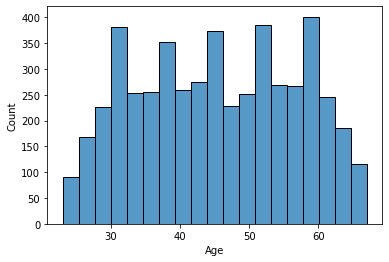

In [18]:
## Checking the distribution of Age

sns.histplot(df.Age);

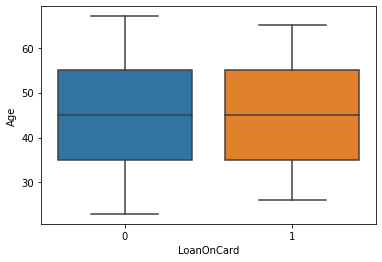

In [19]:
## Checking the distribution of Age with respect to Loan or no Loan

sns.boxplot(x = df.LoanOnCard, y=df.Age);

In [20]:
## ANOVA to check if Loan On Card is dependent on Age

import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('Age ~ LoanOnCard', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ = 2)
print(aov_table)

                   sum_sq      df         F    PR(>F)
LoanOnCard      43.432953     1.0  0.330425  0.565435
Residual    654337.383111  4978.0       NaN       NaN


We see that Age does not help us predict whether there is a loan on card or not since the distribution for both types is almost the same and in the Anova test we fail to reject the hypothesis that average Age for people who have loan on card and those who do not have loan on card are same (Since p_value>0.05)

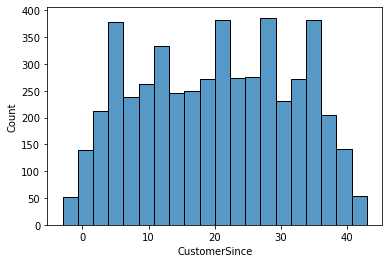

In [21]:
## Checking the distribution of CustomerSince

sns.histplot(df.CustomerSince);

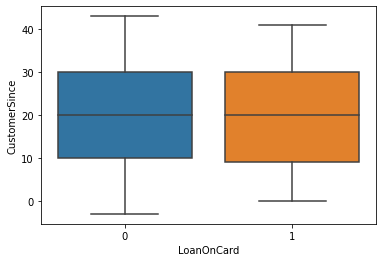

In [22]:
## Checking the distribution of CustomerSince with respect to Loan or no Loan

sns.boxplot(x = df.LoanOnCard, y=df.CustomerSince);

In [23]:
## ANOVA to check if Loan On Card is dependent on CustomerSince

mod = ols('CustomerSince ~ LoanOnCard', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ = 2)
print(aov_table)

                   sum_sq      df         F    PR(>F)
LoanOnCard      39.857285     1.0  0.302982  0.582043
Residual    654855.187694  4978.0       NaN       NaN


We see that CustomerSince does not help us predict whether there is a loan on card or not since the distribution for both types is almost the same and in the Anova test we fail to reject the hypothesis that Average CustomerSince value for people who have loan on card and those who do not have loan on card are equal since p_value>0.05

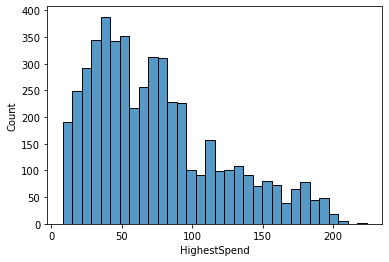

In [24]:
## Checking the distribution of HighestSpend

sns.histplot(df.HighestSpend);

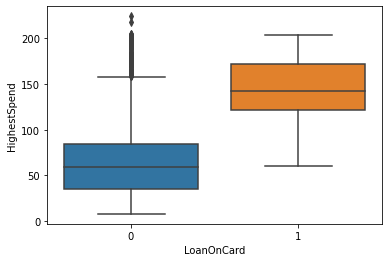

In [25]:
## Checking the distribution of HighestSpend with respect to Loan or no Loan

sns.boxplot(x = df.LoanOnCard, y=df.HighestSpend);

In [26]:
## ANOVA to check if Loan On Card is dependent on HighestSpend

mod = ols('HighestSpend ~ LoanOnCard', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ = 2)
print(aov_table)

                  sum_sq      df           F         PR(>F)
LoanOnCard  2.669746e+06     1.0  1682.71501  3.785424e-317
Residual    7.897948e+06  4978.0         NaN            NaN


Through this plot and the ANOVA test (we reject the null hypothesis that people who have loan on card and those who do not have equal average highest spend since p_value<0.05). We see that People who have higher highest spends tend to have a LoanOnCard

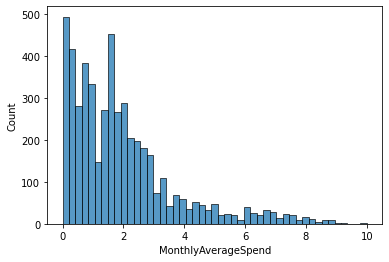

In [27]:
## Checking the distribution of MonthlyAverageSpend

sns.histplot(df.MonthlyAverageSpend);

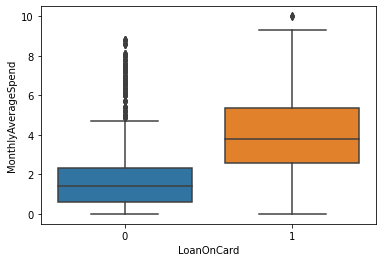

In [28]:
## Checking the distribution of MonthlyAverageSpend with respect to Loan or no Loan

sns.boxplot(x = df.LoanOnCard, y=df.MonthlyAverageSpend);

In [29]:
## ANOVA to check if Loan On Card is dependent on MonthlyAverageSpend

mod = ols('MonthlyAverageSpend ~ LoanOnCard', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ = 2)
print(aov_table)

                  sum_sq      df           F         PR(>F)
LoanOnCard   2052.790791     1.0  774.414567  1.551693e-158
Residual    13195.506637  4978.0         NaN            NaN


Through this plot and the ANOVA test (we reject the null hypothesis that people who have loan on card and those who do not, have equal Monthly Average Spend since p_value<0.05) we see that people who have higher MonthlyAverageSpend tend to have a LoanOnCard

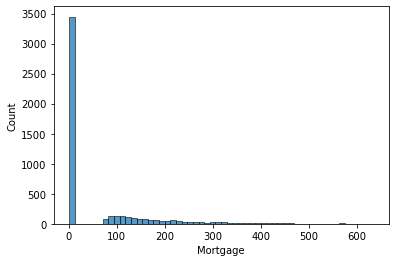

In [30]:
## Checking the distribution of Mortgage

sns.histplot(df.Mortgage);

We see through this plot that a majority of people have zero mortgage

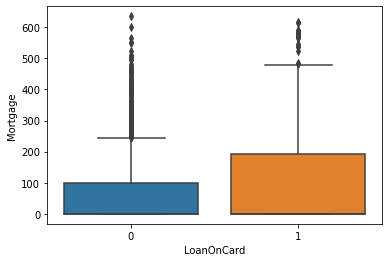

In [31]:
sns.boxplot(x = df.LoanOnCard, y=df.Mortgage);

In [32]:
## ANOVA to check if Loan On Card is dependent on Mortgage

mod = ols('Mortgage ~ LoanOnCard', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ = 2)
print(aov_table)

                  sum_sq      df           F        PR(>F)
LoanOnCard  1.040408e+06     1.0  102.364041  7.843483e-24
Residual    5.059543e+07  4978.0         NaN           NaN


Through this plot and the ANOVA test (we reject the null hypothesis that people who have loan on card and those who do not, have equal Mortgage since p_value<0.05) we see that people who have higher Mortgage tend to have a LoanOnCard.

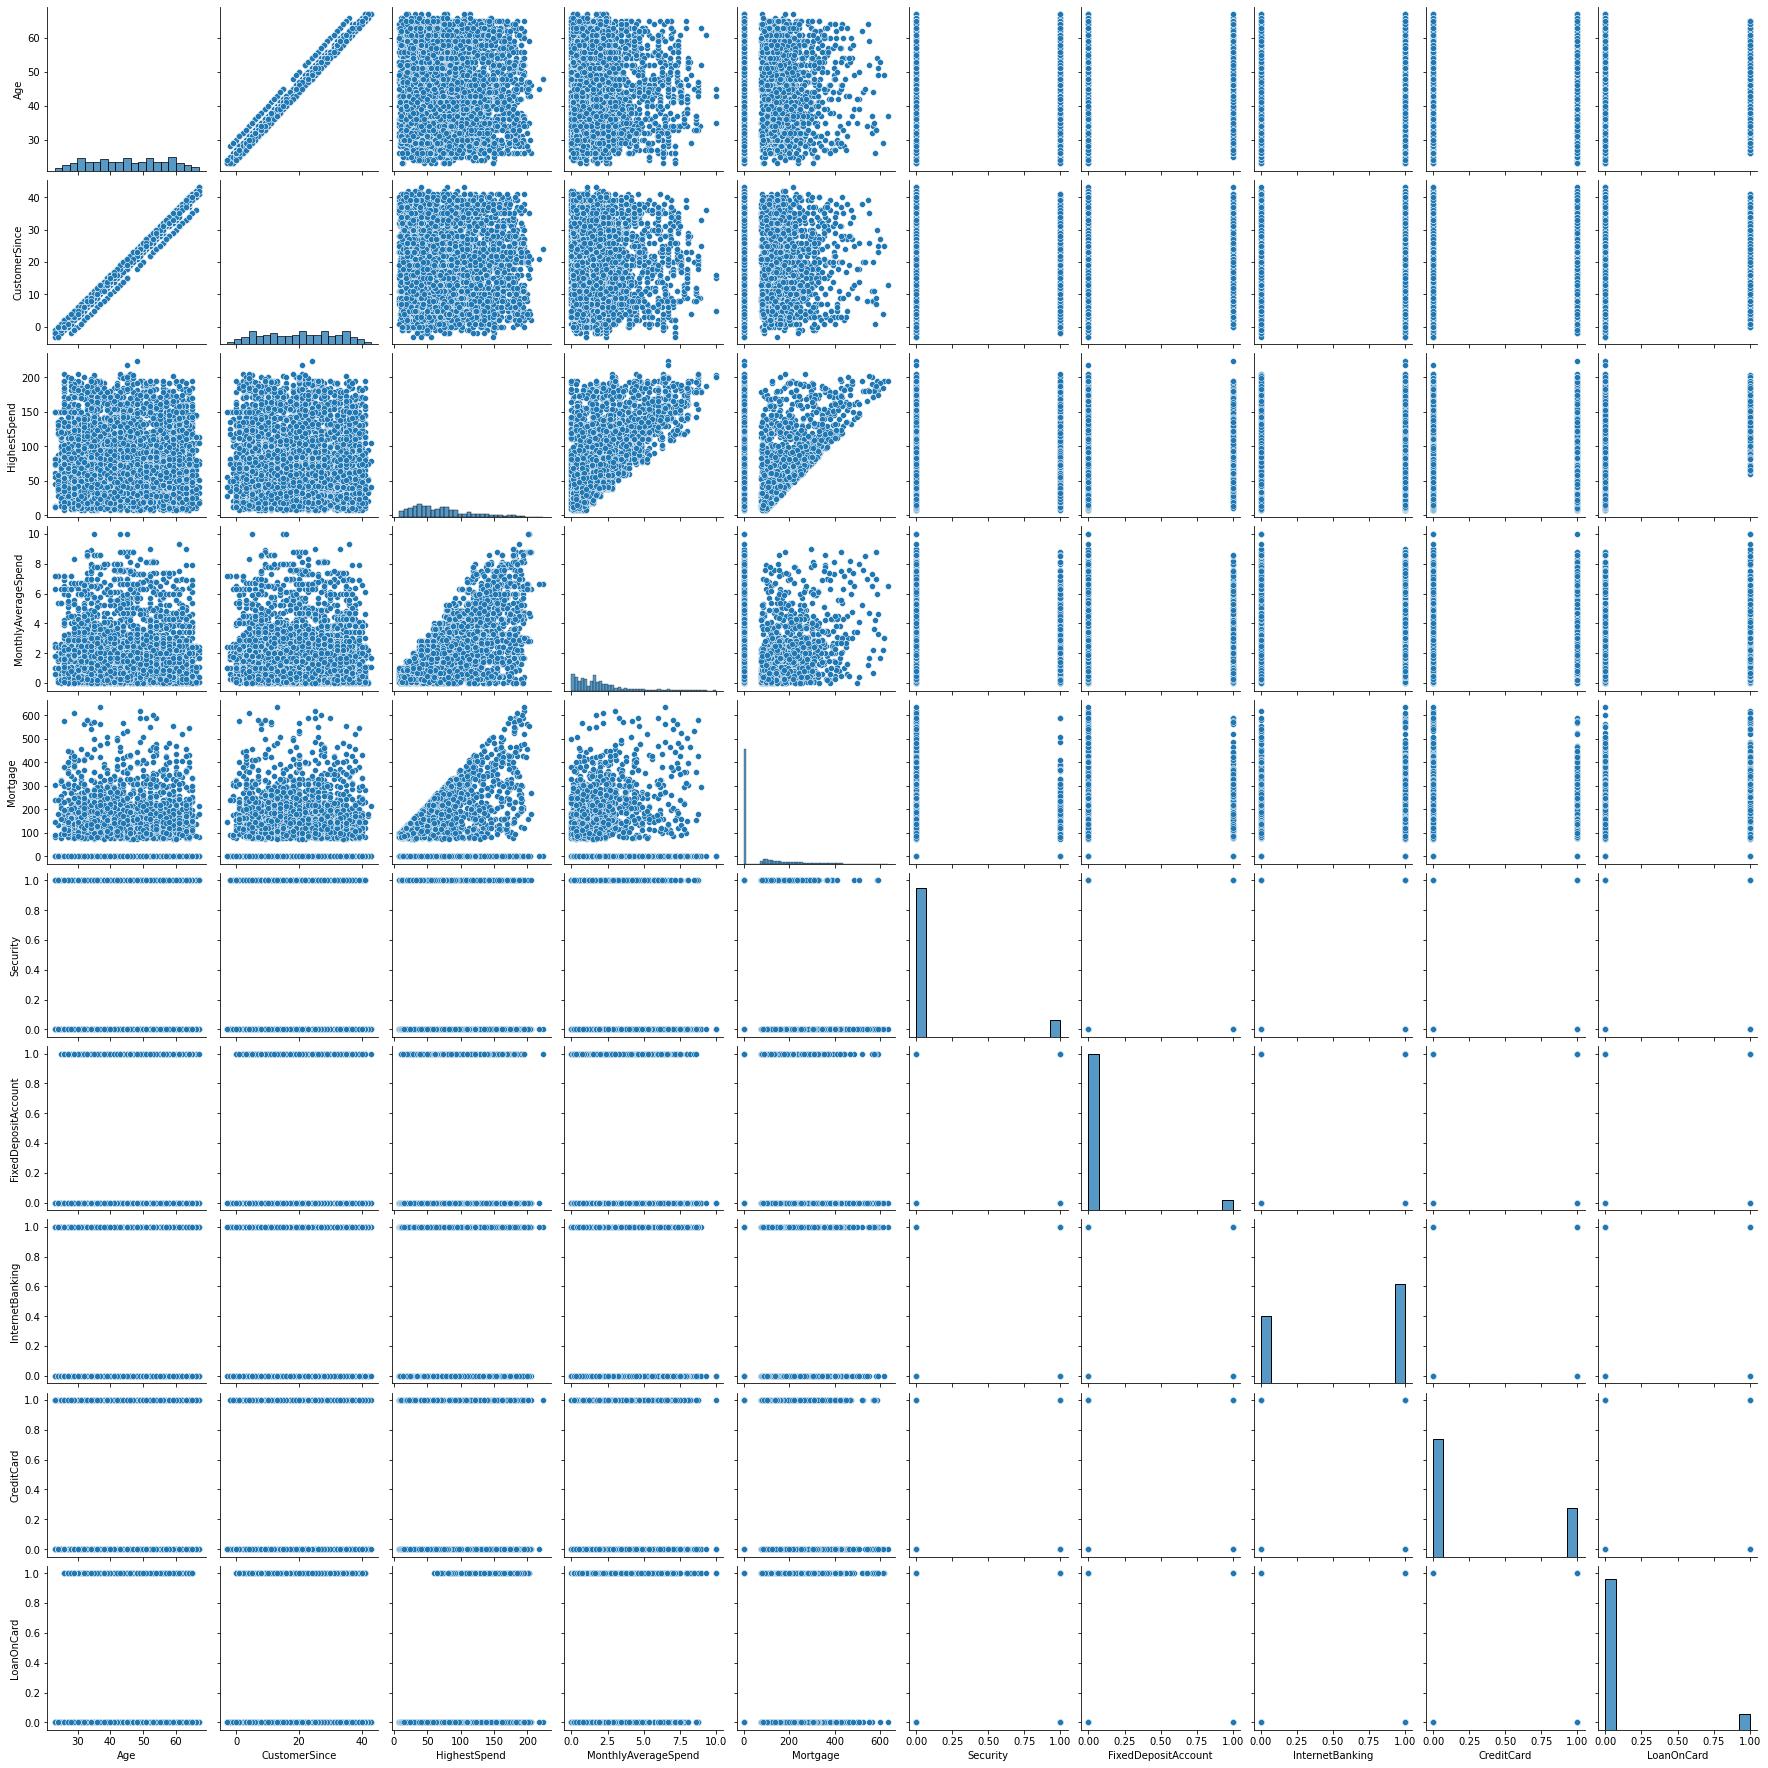

In [33]:
sns.pairplot(df);

Through the pairplot it seems that except for the following pairs the variables do not have any specific relationship with each other:

1. Age and CustomerSince
2. MonthlyAverageSpend and HighestSpend
3. HighestSpend and Mortgage

In [34]:
df.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

### Amongst the Categorical variables we can try to see if they idependently can show a high/low probability of LoanOnCard

In [35]:
## Looking at percentage of people who have LoanOnCard vs who do not

print('Percentage of people who actually have a Loan on Card =',round(100*df.LoanOnCard.value_counts()[1]/len(df),2),'%')

Percentage of people who actually have a Loan on Card = 9.64 %


In [36]:
## Comparing the percentage of people who have a security asset with the bank and have a loan

print('Percentage of people who have Security Asset with Bank =',round(100*df.Security.value_counts()[1]/len(df),2),'%')
print("Percentage of people who have Security Asset with Bank and have a Loan on Card =",round(100*df[df.Security==1].LoanOnCard.value_counts()[1]/len(df[df.Security==1]),2),'%')
print("Percentage of people who do not have Security Asset with Bank and have Loan on Card =",round(100*df[df.Security==0].LoanOnCard.value_counts()[1]/len(df[df.Security==0]),2),'%')

Percentage of people who have Security Asset with Bank = 10.44 %
Percentage of people who have Security Asset with Bank and have a Loan on Card = 11.54 %
Percentage of people who do not have Security Asset with Bank and have Loan on Card = 9.42 %


In [37]:
## Chi-Squared Test to check independence of Loan on Card from Security Asset

from scipy.stats import chisquare
chisquare([11.54,9.42], f_exp=[9.64,9.64]) ## Since 9.64% is the percentage of people with Loan On Card

Power_divergenceResult(statistic=0.3795020746887961, pvalue=0.5378698380555293)

pvalue >0.05... Therefore Security Asset with Bank is independent of Loan On Card. Therefore there isn't much difference between people who have a security asset with the bank and people who do not in terms of Loan on Card

In [38]:
## Comparing the percentage of people who have a Fixed Deposit Account with the bank and have a loan

print('Percentage of people who have Fixed Deposit Account with Bank =',round(100*df.FixedDepositAccount.value_counts()[1]/len(df),2),'%')
print("Percentage of people who have Fixed Deposit Account with Bank and have a Loan on Card =",round(100*df[df.FixedDepositAccount==1].LoanOnCard.value_counts()[1]/len(df[df.FixedDepositAccount==1]),2),'%')
print("Percentage of people who do not have Fixed Deposit Account with Bank and have Loan on Card =",round(100*df[df.FixedDepositAccount==0].LoanOnCard.value_counts()[1]/len(df[df.FixedDepositAccount==0]),2),'%')

Percentage of people who have Fixed Deposit Account with Bank = 6.06 %
Percentage of people who have Fixed Deposit Account with Bank and have a Loan on Card = 46.36 %
Percentage of people who do not have Fixed Deposit Account with Bank and have Loan on Card = 7.27 %


In [39]:
## Chi-Squared Test to check independence of Loan on Card from Fixed Deposit Account

chisquare([46.36,7.27], f_exp=[9.64,9.64])

Power_divergenceResult(statistic=140.4538692946058, pvalue=2.1181861630123147e-32)

pvalue < 0.05... Therefore Fixed Deposit Account with Bank is not independent of Loan On Card. Therefore we see that people who have a Fixed Deposit Account with the bank are more likely to have a Loan on Card

In [40]:
## Comparing the percentage of people who have Internet Banking with the bank and have a loan

print('Percentage of people who have Internet Banking with Bank =',round(100*df.InternetBanking.value_counts()[1]/len(df),2),'%')
print("Percentage of people who have Internet Banking with Bank and have a Loan on Card =",round(100*df[df.InternetBanking==1].LoanOnCard.value_counts()[1]/len(df[df.InternetBanking==1]),2),'%')
print("Percentage of people who do not have Internet Banking with Bank and have Loan on Card =",round(100*df[df.InternetBanking==0].LoanOnCard.value_counts()[1]/len(df[df.InternetBanking==0]),2),'%')

Percentage of people who have Internet Banking with Bank = 59.72 %
Percentage of people who have Internet Banking with Bank and have a Loan on Card = 9.78 %
Percentage of people who do not have Internet Banking with Bank and have Loan on Card = 9.42 %


In [41]:
## Chi-Squared Test to check independence of Loan on Card from Internet Banking

chisquare([9.78,9.42], f_exp=[9.64,9.64])

Power_divergenceResult(statistic=0.007053941908713687, pvalue=0.9330661725808607)

pvalue >0.05... Therefore Internet Banking with Bank is independent of Loan On Card. Therefore there isn't much difference between people who have Internet Banking with the bank and people who do not in terms of Loan on Card

In [42]:
## Comparing the percentage of people who have Credit Card with the bank and have a loan

print('Percentage of people who have Credit Card with Bank =',round(100*df.CreditCard.value_counts()[1]/len(df),2),'%')
print("Percentage of people who have Credit Card with Bank and have a Loan on Card =",round(100*df[df.CreditCard==1].LoanOnCard.value_counts()[1]/len(df[df.CreditCard==1]),2),'%')
print("Percentage of people who do not have Credit Card with Bank and have Loan on Card =",round(100*df[df.CreditCard==0].LoanOnCard.value_counts()[1]/len(df[df.CreditCard==0]),2),'%')

Percentage of people who have Credit Card with Bank = 29.44 %
Percentage of people who have Credit Card with Bank and have a Loan on Card = 9.75 %
Percentage of people who do not have Credit Card with Bank and have Loan on Card = 9.59 %


In [43]:
## Chi-Squared Test to check independence of Loan on Card from Credit Card

chisquare([9.75,9.59], f_exp=[9.64,9.64])

Power_divergenceResult(statistic=0.0015145228215767577, pvalue=0.9689566659203306)

pvalue >0.05... Therefore Credit Card with Bank is independent of Loan On Card. Therefore there isn't much difference between people who have Credit Card with the bank and people who do not in terms of Loan on Card

In [44]:
## Comparing the percentage of people who have Loan on Card with respect to Hidden Score

print("Percentage of people who have Hidden Score = 1 and have Loan on Card =",round(100*df[df.HiddenScore=='1'].LoanOnCard.value_counts()[1]/len(df[df.HiddenScore=='1']),2),'%')
print("Percentage of people who have Hidden Score = 2 and have Loan on Card =",round(100*df[df.HiddenScore=='2'].LoanOnCard.value_counts()[1]/len(df[df.HiddenScore=='2']),2),'%')
print("Percentage of people who have Hidden Score = 3 and have Loan on Card =",round(100*df[df.HiddenScore=='3'].LoanOnCard.value_counts()[1]/len(df[df.HiddenScore=='3']),2),'%')
print("Percentage of people who have Hidden Score = 4 and have Loan on Card =",round(100*df[df.HiddenScore=='4'].LoanOnCard.value_counts()[1]/len(df[df.HiddenScore=='4']),2),'%')



Percentage of people who have Hidden Score = 1 and have Loan on Card = 7.3 %
Percentage of people who have Hidden Score = 2 and have Loan on Card = 8.2 %
Percentage of people who have Hidden Score = 3 and have Loan on Card = 13.22 %
Percentage of people who have Hidden Score = 4 and have Loan on Card = 11.03 %


In [45]:
## Chi-Squared Test to check independence of Loan on Card from Hidden Scores

chisquare([7.3,8.2,13.22,11.03], f_exp=[9.64,9.64,9.64,9.64])

Power_divergenceResult(statistic=2.3130394190871373, pvalue=0.5100275040720386)

pvalue >0.05... Therefore Hidden Scores is independent of Loan On Card. There isn't much difference between people with different Hidden Scores in terms of having a loan on card

In [46]:
## Comparing the percentage of people who have Loan on Card with respect to Level

print("Percentage of people who have Level = 1 and have Loan on Card =",round(100*df[df.Level=='1'].LoanOnCard.value_counts()[1]/len(df[df.Level=='1']),2),'%')
print("Percentage of people who have Level = 2 and have Loan on Card =",round(100*df[df.Level=='2'].LoanOnCard.value_counts()[1]/len(df[df.Level=='2']),2),'%')
print("Percentage of people who have Level = 3 and have Loan on Card =",round(100*df[df.Level=='3'].LoanOnCard.value_counts()[1]/len(df[df.Level=='3']),2),'%')

Percentage of people who have Level = 1 and have Loan on Card = 4.45 %
Percentage of people who have Level = 2 and have Loan on Card = 13.05 %
Percentage of people who have Level = 3 and have Loan on Card = 13.7 %


In [47]:
## Chi-Squared Test to check independence of Loan on Card from Level

chisquare([4.45,13.05,13.7], f_exp=[9.64,9.64,9.64])

Power_divergenceResult(statistic=5.710352697095435, pvalue=0.057545672130328865)

pvalue >0.05... Therefore Level is independent of Loan On Card. There isn't much difference between people with different Level in terms of having a loan on card. Although we do see that people who are on level 1 tend to have slightly lower loan on Card compared to others( p value is also quite close to 0.05)

### Basis the Analysis we find that the variables HighestSpend, MonthlyAverageSpend, Mortgage and FixedDepositAccount have some relationship with LoanOnCard 

# Data Preprocessing

In [48]:
## Separating the X variables from the target variable

df.reset_index(inplace=True)
df.drop('index', axis = 1, inplace=True)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [49]:
## Dropping ID and Zipcode as they will not help in predictions

X.drop('ID', axis = 1, inplace=True)
X.drop('ZipCode', axis =1, inplace = True)

In [50]:
## Getting Dummy variables in places of HiddenScore and Level columns

X = pd.get_dummies(X, columns = ['HiddenScore','Level'])

In [51]:
## Dropping the redundant columns of HiddenScore_4 and Level_3

X.drop('HiddenScore_4',axis = 1, inplace=True)
X.drop('Level_3', axis=1, inplace = True)

In [52]:
## Checking for target balancing

df.LoanOnCard.value_counts()

0    4500
1     480
Name: LoanOnCard, dtype: int64

We see that the data is quite imbalanced with LoanOnCard = 1 being the minority class. Therefore we need to either Over Sample the minority class or undersample the majority class to help the model learn better

In [53]:
## Using SMOTE (Synthetic Minority Oversampling Technique) to oversample. If the results are not good or we get overfitting we will then try undersampling of the majority class


## importing library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_new, y_new = smote.fit_resample(X, y)

print(y.value_counts())
print(y_new.value_counts())

0    4500
1     480
Name: LoanOnCard, dtype: int64
0    4500
1    4500
Name: LoanOnCard, dtype: int64


In [54]:
## Segregating the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_new,y_new, test_size = 0.3, random_state = 42)

In [55]:
## Checking the shape of the train and test sets

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6300, 14), (2700, 14), (6300,), (2700,))

In [56]:
X_train

,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,HiddenScore_1,HiddenScore_2,HiddenScore_3,Level_1,Level_2
7581,35,10,130,4.791231,315,0,0,0,0,0,0,1,0,0
8484,35,9,136,0.911570,417,0,0,1,0,0,0,0,0,1
6215,54,29,131,1.601209,0,0,0,0,0,0,1,0,0,0
6884,49,24,83,3.100000,0,0,0,1,0,0,0,0,0,0
3647,27,3,59,1.600000,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,59,33,153,3.272521,0,0,0,0,0,0,0,0,0,0
5191,34,9,162,5.865464,0,0,0,0,0,0,0,0,0,0
5390,34,9,161,5.565405,0,0,0,1,0,1,0,0,0,0
860,57,31,58,0.200000,177,0,0,1,0,1,0,0,1,0


In [57]:
## Ratio of LoanOnCard = 1 class in train vs test sets

y_train.value_counts(), y_test.value_counts()

(0    3154
 1    3146
 Name: LoanOnCard, dtype: int64,
 1    1354
 0    1346
 Name: LoanOnCard, dtype: int64)

Load balancing on both train and test sets also seem to be fine now

In [58]:
## Standardizing the data

sc = StandardScaler()
sc.fit(X_train.iloc[:,:5])
X_train.iloc[:,:5] = sc.transform(X_train.iloc[:,:5])
X_test.iloc[:,:5] = sc.transform(X_test.iloc[:,:5])

# Model Training, Testing and Tuning

In [59]:
## Logistic Regression Model

log_model = LogisticRegression(solver='liblinear')
log_model.fit(X_train,y_train)

y_log_pred = log_model.predict(X_test)

In [60]:
print(f'Model Accuracy for Logistic Regression model on train set is {100*(round(log_model.score(X_train,y_train),4))}%')
print(f'Model Accuracy for Logistic Regression model on test set is {round(log_model.score(X_test,y_test),4)*100}%')

Model Accuracy for Logistic Regression model on train set is 94.67%
Model Accuracy for Logistic Regression model on test set is 93.37%


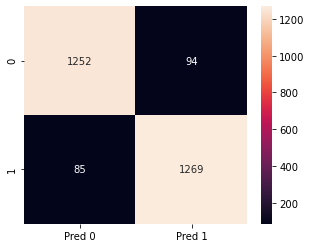

In [61]:
## Creating the confusion matrix for logistic regression

lab = [0, 1]
plab = ['Pred 0', 'Pred 1']
cm = confusion_matrix(y_test,y_log_pred,labels = lab)

df_cm = pd.DataFrame(cm, index = [i for i in lab], columns = [i for i in plab])
plt.figure(figsize = (5,4))
sns.heatmap(df_cm ,annot=True, fmt = 'g');

In [62]:
## Creating the classification report

print(classification_report(y_test.values,y_log_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1346
           1       0.93      0.94      0.93      1354

    accuracy                           0.93      2700
   macro avg       0.93      0.93      0.93      2700
weighted avg       0.93      0.93      0.93      2700



The Classification report states the Precision, Recall and F1-Score of the two classes and it gives a better measure of model performance than just accuracy

Recall gives us the correct predictions of the given class out of all the times the class occurs in the dataset
The recall for 1 is 0.94, therefore we can say that if 1 occurs 100 times in the data we were able to identify it correctly  94 times
 
 
 
Precision gives us what proportion of positive classification for every class was actually correct
The precision for 1 is 0.93, therefore we can say if we classified a 100 people in the 1 category we were right 93 times 
 
 
 
F1 Score is a combination of both the metrics Precision and Recall. It balances the aspects of both Precision and Recall. It is the harmonic mean of Precision and Recall
 
The F1 Score for 1 is 0.93
 
 
Therefore we see that we are able to predict the people with LoanOnCard pretty well with the Logistic Regression Model

In [63]:
## Naive Bayes Classifier

nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

y_nb_pred = nb_model.predict(X_test)

In [64]:
print(f'Model Accuracy for Naive Bayes Classifier model on train set is {100*(round(nb_model.score(X_train,y_train),4))}%')
print(f'Model Accuracy for Naive Bayes Classifier model on test set is {round(nb_model.score(X_test,y_test),4)*100}%')

Model Accuracy for Naive Bayes Classifier model on train set is 92.60000000000001%
Model Accuracy for Naive Bayes Classifier model on test set is 91.85%


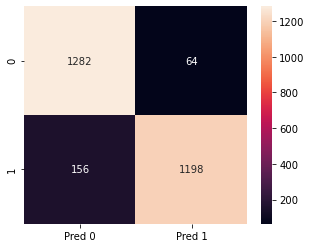

In [65]:
## Creating the confusion matrix for naive bayes model

lab = [0, 1]
plab = ['Pred 0', 'Pred 1']
cm = confusion_matrix(y_test,y_nb_pred,labels = lab)

df_cm = pd.DataFrame(cm, index = [i for i in lab], columns = [i for i in plab])
plt.figure(figsize = (5,4))
sns.heatmap(df_cm ,annot=True, fmt = 'g');

In [66]:
## Creating the classification report for naive bayes

print(classification_report(y_test.values,y_nb_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1346
           1       0.95      0.88      0.92      1354

    accuracy                           0.92      2700
   macro avg       0.92      0.92      0.92      2700
weighted avg       0.92      0.92      0.92      2700



The Classification report states the Precision, Recall and F1-Score of the two classes and it gives a better measure of model performance than just accuracy

Recall gives us the correct predictions of the given class out of all the times the class occurs in the dataset
The recall for 1 is 0.88, therefore we can say that if 1 occurs 100 times in the data we were able to identify it correctly  88 times
 
 
 
Precision gives us what proportion of positive classification for every class was actually correct
The precision for 1 is 0.95, therefore we can say if we classified a 100 people in the 1 category we were right 95 times 
 
 
 
F1 Score is a combination of both the metrics Precision and Recall. It balances the aspects of both Precision and Recall. It is the harmonic mean of Precision and Recall
 
The F1 Score for 1 is 0.92
 
 
Therefore we see that we are able to predict the people with LoanOnCard pretty well even with the Naive Bayes model.

### Selecting the best possible model

In [67]:
## Trying out Logistic Regression

## Creating a dataframe with the Hyperparameters and the accuracies achieved with the Hyperparameters

model_df = pd.DataFrame(columns = ['Solver','Penalty','C_Value','Accuracy'])
iter = 0
for i in ['newton-cg', 'lbfgs', 'liblinear']:
    for j in [100, 10, 1.0, 0.1, 0.01]:                    
        log_model_2 = LogisticRegression(solver = i, penalty = 'l2', C = j)
        log_model_2.fit(X_train,y_train)
        score = 100*round(log_model_2.score(X_test,y_test),4)
        model_df = model_df.append(pd.DataFrame({'Solver':i,'Penalty':'l2','C_Value':j,'Accuracy':score}, index = [iter]))
        iter = iter+1

In [68]:
## Sorting the values in the dataframe 

model_df.sort_values('Accuracy', ascending = False, inplace=True)

In [69]:
model_df

,Solver,Penalty,C_Value,Accuracy
0,newton-cg,l2,100,93.44
1,newton-cg,l2,10,93.44
5,lbfgs,l2,100,93.44
6,lbfgs,l2,10,93.44
10,liblinear,l2,100,93.44
11,liblinear,l2,10,93.44
2,newton-cg,l2,1.00,93.37
7,lbfgs,l2,1.00,93.37
12,liblinear,l2,1.00,93.37
13,liblinear,l2,0.10,93.30


We see that several models give us an accuracy of 93.44% and therefore we can use any one of them. I would choose to use the models with solver = liblinear. Other models (apart from the one's in the grid) with solver = saga, sag were also tried along with penalties including l1 and elasticnet, however, the highest accuracy reached was 93.44%

In [70]:
## Logistic Regression Model

log_model_3 = LogisticRegression(solver='liblinear', penalty = 'l2', C = 10)
log_model_3.fit(X_train,y_train)

y_log_pred = log_model_3.predict(X_test)

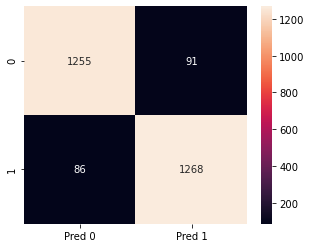

In [71]:
## Creating the confusion matrix for best Logistic Regression Model

lab = [0, 1]
plab = ['Pred 0', 'Pred 1']
cm = confusion_matrix(y_test,y_log_pred,labels = lab)

df_cm = pd.DataFrame(cm, index = [i for i in lab], columns = [i for i in plab])
plt.figure(figsize = (5,4))
sns.heatmap(df_cm ,annot=True, fmt = 'g');

In [72]:
## Creating the classification report

print(classification_report(y_test.values,y_log_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1346
           1       0.93      0.94      0.93      1354

    accuracy                           0.93      2700
   macro avg       0.93      0.93      0.93      2700
weighted avg       0.93      0.93      0.93      2700



The Classification report states the Precision, Recall and F1-Score of the two classes and it gives a better measure of model performance than just accuracy

Recall gives us the correct predictions of the given class out of all the times the class occurs in the dataset
The recall for 1 is 0.94, therefore we can say that if 1 occurs 100 times in the data we were able to identify it correctly  94 times
 
 
 
Precision gives us what proportion of positive classification for every class was actually correct
The precision for 1 is 0.93, therefore we can say if we classified a 100 people in the 1 category we were right 93 times 
 
 
 
F1 Score is a combination of both the metrics Precision and Recall. It balances the aspects of both Precision and Recall. It is the harmonic mean of Precision and Recall
 
The F1 Score for 1 is 0.93
 
 
Therefore we see that we are able to predict the people with LoanOnCard pretty well with the Logistic Regression Model

### Best Logistic Regression Model is model with solver = liblinear, C = 100 or 10 and penalty = l2

In [73]:
## Now trying out Naive Bayes

model_df_2 = pd.DataFrame(columns = ['var_smoothing','Accuracy'])
iter = 0
for i in np.logspace(0,-9, num=1000):                    
    nb_model_2 = GaussianNB(var_smoothing=i)
    nb_model_2.fit(X_train,y_train)
    score = 100*round(nb_model_2.score(X_test,y_test),4)
    model_df_2 = model_df_2.append(pd.DataFrame({'var_smoothing':i,'Accuracy':score}, index = [iter]))
    iter = iter+1

In [74]:
## Sorting the values in the dataframe 

model_df_2.sort_values('Accuracy', ascending = False, inplace=True)

In [75]:
model_df_2

,var_smoothing,Accuracy
144,0.050432,93.26
140,0.054795,93.22
145,0.049396,93.22
146,0.048382,93.22
138,0.057116,93.22
...,...,...
4,0.920373,90.41
3,0.939665,90.41
2,0.959361,90.37
0,1.000000,90.37


In [79]:
nb_model_3 = GaussianNB(var_smoothing=0.050432)
nb_model_3.fit(X_train,y_train)

y_nb_pred = nb_model_3.predict(X_test)

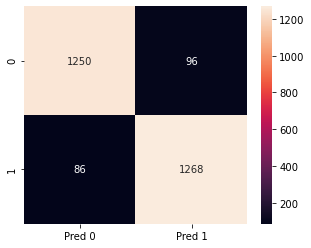

In [80]:
## Creating the confusion matrix for the best naive bayes model

lab = [0, 1]
plab = ['Pred 0', 'Pred 1']
cm = confusion_matrix(y_test,y_nb_pred,labels = lab)

df_cm = pd.DataFrame(cm, index = [i for i in lab], columns = [i for i in plab])
plt.figure(figsize = (5,4))
sns.heatmap(df_cm ,annot=True, fmt = 'g');

In [81]:
## Creating the classification report for naive bayes

print(classification_report(y_test.values,y_nb_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1346
           1       0.93      0.94      0.93      1354

    accuracy                           0.93      2700
   macro avg       0.93      0.93      0.93      2700
weighted avg       0.93      0.93      0.93      2700



The Best Naive Bayes Model is the model with var_smoothing=0.050432

The Classification report for the best Naive Bayes model states the Precision, Recall and F1-Score of the two classes and it gives a better measure of model performance than just accuracy

Recall gives us the correct predictions of the given class out of all the times the class occurs in the dataset
The recall for 1 is 0.94, therefore we can say that if 1 occurs 100 times in the data we were able to identify it correctly  94 times
 
 
 
Precision gives us what proportion of positive classification for every class was actually correct
The precision for 1 is 0.93, therefore we can say if we classified a 100 people in the 1 category we were right 93 times 
 
 
 
F1 Score is a combination of both the metrics Precision and Recall. It balances the aspects of both Precision and Recall. It is the harmonic mean of Precision and Recall
 
The F1 Score for 1 is 0.93
 
 
Therefore we see that we are able to predict the people with LoanOnCard pretty well even with the Naive Bayes model.

# Conclusion on the result: 

### After looking at both modelling techniques we finally see the best logistic regression model is very slightly better than the best Naive Bayes Model.

### Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the bank to perform a better data analysis in future.

1. While collecting data it would be better if try to have no null values because we lose some information in the process. We lost 20 rows in the data due to NA values


2. While collecting data it would be better if we can collect data equally for all classes otherwise we may have a situation of imbalanced classes like we did in this case.


3. There are no questions or suggestions on variety, velocity and veracity as data is tabular, static and seems to have come from a research team